# Train OCR text Detector quick example

For train datasets please download last version of ocr datasets [https://nomeroff.net.ua/datasets/](https://nomeroff.net.ua/datasets/). Unpack archive and rename to **./datasets/ocr** .
For examle
```bash
cd ./datasets/ocr
wget https://nomeroff.net.ua/datasets/autoriaNumberplateOcrUa-2019-02-19.zip
unzip autoriaNumberplateOcrUa-2019-02-19.zip
mv autoriaNumberplateOcrUa-2019-02-19 ua
```
or use your own dataset.

In [1]:
import os
import sys

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')
dataset_name = "ua"
version = "1"
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "datasets/ocr/", dataset_name)
print(dataset_name)
RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/", 'anpr_ocr_{}-{}.h5'.format(dataset_name, version))

sys.path.append(NOMEROFF_NET_DIR)

from NomeroffNet.Base import OCR

ua


Using TensorFlow backend.


In [2]:
from Base import OCR

class ua(OCR):
    def __init__(self):
        OCR.__init__(self)
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "E", "H", "I", "K", "M", "O", "P", "T", "X"]
        
        self.EPOCHS = 1

GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H I K M O P T X

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


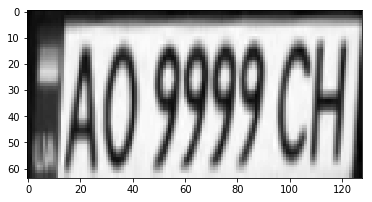

2) the_labels (plate number): AO9999CH is encoded as [10, 18, 9, 9, 9, 9, 12, 14]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8

START TRAINING
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input (InputLayer)          (None, 128, 64, 1)   0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input[0][0]                  
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
________________________________________________________________________________

KeyboardInterrupt: 

In [3]:
ocrTextDetector = ua()
model = ocrTextDetector.train(PATH_TO_DATASET)

In [ ]:
model.save(RESULT_MODEL_PATH)